In [1]:
from datascience import *
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=np.VisibleDeprecationWarning)

## Changing the number of simulations

In [2]:
def simulate_one_count(sample_size):
    return np.count_nonzero(np.random.choice(['S', 'R'], sample_size) == 'S')
simulate_one_count(200)

97

In [3]:
# Re-run the test with a new simulation under the null
def run_test(num_simulations, sample_size):
    counts = make_array()
    for i in np.arange(num_simulations):
        counts = np.append(counts, simulate_one_count(sample_size))
    return counts

counts = run_test(10000, 200)
np.count_nonzero(counts <= 91)/len(counts)

0.1189

In [4]:
#Changing number of simulations
# Let's repeat that 50 times for each number of simulations
tests = Table(['simulations', 'p-value for 91'])
for num_sims in [100, 1000, 10000]:
    for k in np.arange(50):
        counts = run_test(num_sims, 200)
        tests = tests.with_row([
            num_sims, 
            np.count_nonzero(counts <= 91)/len(counts),
        ])
tests.show(3)

simulations,p-value for 91
100,0.19
100,0.17
100,0.11


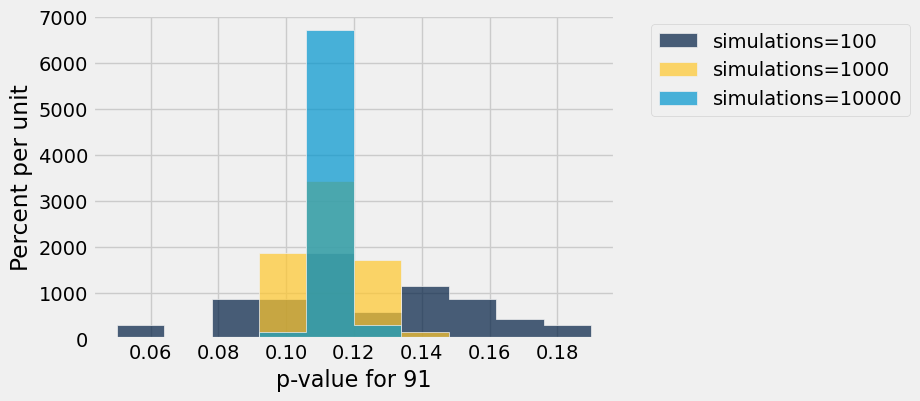

In [5]:
# For larger numbers of simulations, p-values are more consistent
tests.hist(1, group='simulations')

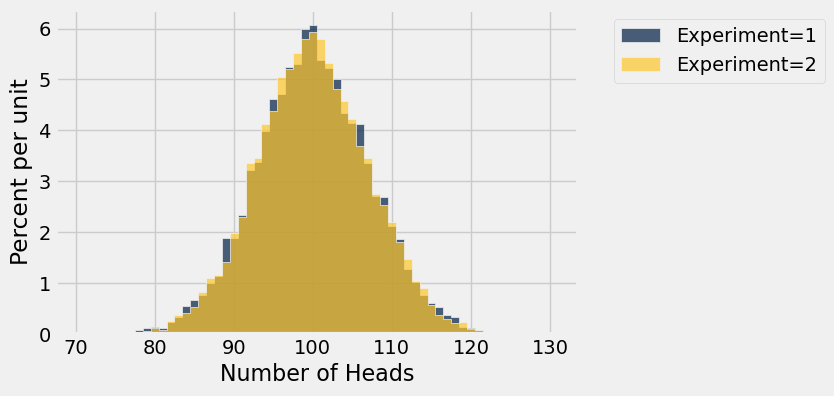

In [6]:
# Since a large number of simulations provides a good estimate of the
# theoretical distribution of the test statistic under the null hypothesis
num_sims = 10000
counts_1 = run_test(num_sims, 200)
counts_2 = run_test(num_sims, 200)
t = Table().with_columns(
    'Experiment', [1] * num_sims + [2] * num_sims,
    'Number of Heads', np.append(counts_1, counts_2))
t.hist(1, group='Experiment', bins=np.arange(70.5, 131, 1))

## Changing the size of the taste test

In [7]:
# Suppose that the true proportion of people who prefer Super Soda is 45%
true_proportion = 0.45
true_distribution = make_array(true_proportion, 1 - true_proportion)
true_distribution

array([ 0.45,  0.55])

In [8]:
# Taste tests with 200 people will give varioius numbers of people who prefer Super Soda
sample_size = 200
sample_proportions(sample_size, true_distribution) * sample_size

array([  96.,  104.])

In [9]:
# If you run a taste test for 200 people, what might you conclude?
def run_experiment(num_simulations, sample_size, true_proportion):
    # Collect data
    true_distribution = make_array(true_proportion, 1 - true_proportion)
    taste_test_results = sample_proportions(sample_size, true_distribution) * sample_size
    observed_stat_from_this_sample = taste_test_results.item(0)
    
    # Conduct hypothesis test
    counts = run_test(num_simulations, sample_size)
    p_value = np.count_nonzero(counts <= observed_stat_from_this_sample) / len(counts)
    return p_value

run_experiment(10000, 200, 0.45)

0.0206

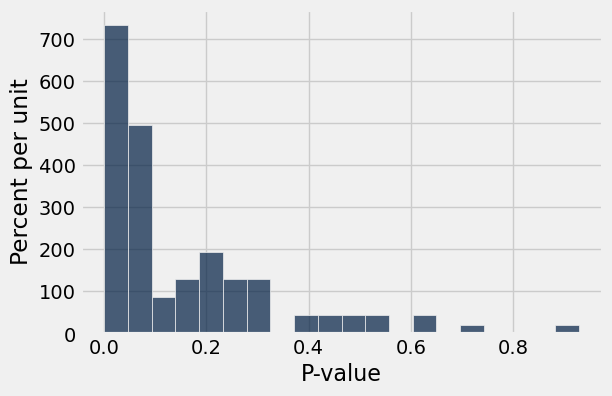

In [10]:
# Let's imagine running our taste test over and over again to see how often we reject the null
true_proportion = 0.45
sample_size = 200
p_values = make_array()
for k in np.arange(100):
    p_value = run_experiment(10000, sample_size, true_proportion)
    p_values = np.append(p_values, p_value)
Table().with_column('P-value', p_values).hist(0, bins=20)